In [1]:
%cd "D:\School\Graduate 2022 Summer\ROAR CSV\ROAR CSV"

D:\School\Graduate 2022 Summer\ROAR CSV\ROAR CSV


In [2]:
pwd()

'D:\\School\\Graduate 2022 Summer\\ROAR CSV\\ROAR CSV'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('SimData_2022.06.09_11.43.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()



C:\Users\david\AppData\Local\Temp\ipykernel_15712\1071953324.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [5]:
# initalize hover or not, left turn, right turn column
df3['HoverOrNot'] = 0
df3['RighTurn'] = 0
df3['LeftTurn'] = 0

In [6]:
# Assign Hover Or Not based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 15:47:53') & (df3['datetime'] <= '2022-06-09 15:54:27'),['HoverOrNot']] = 10

# Assign right turn based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 15:47:53') & (df3['datetime'] <= '2022-06-09 15:48:19'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 15:48:43') & (df3['datetime'] <= '2022-06-09 15:49:11'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 15:49:57') & (df3['datetime'] <= '2022-06-09 15:50:30'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 15:51:01') & (df3['datetime'] <= '2022-06-09 15:51:23'),['RighTurn']] = 5

# Assign left turn based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 15:52:09') & (df3['datetime'] <= '2022-06-09 15:52:28'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 15:52:41') & (df3['datetime'] <= '2022-06-09 15:53:07'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 15:53:27') & (df3['datetime'] <= '2022-06-09 15:53:43'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 15:54:10') & (df3['datetime'] <= '2022-06-09 15:54:27'),['LeftTurn']] = 8

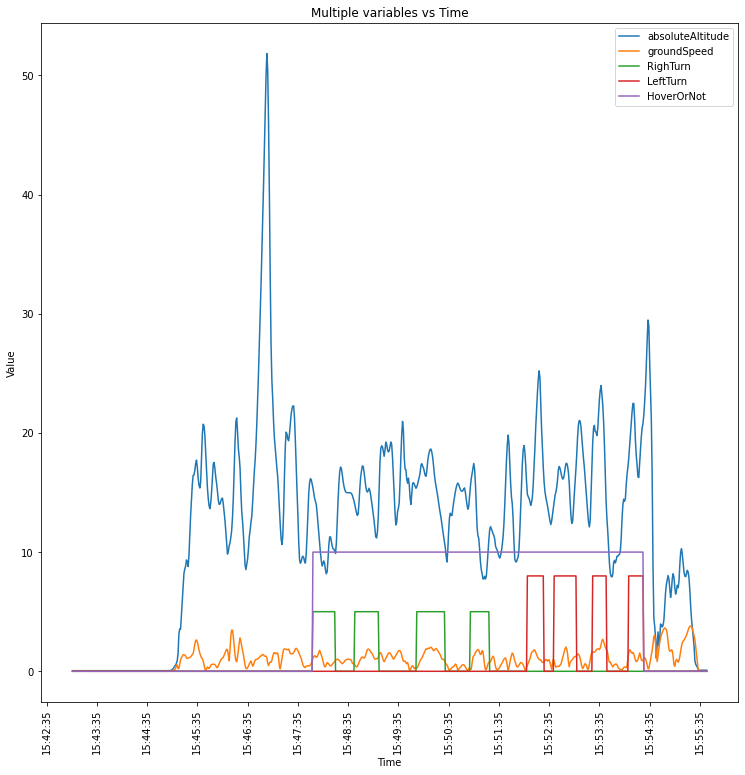

In [7]:
import matplotlib.dates as mdates

plt.figure(figsize=(12.5, 12.5))
plt.plot('datetime','absoluteAltitude',
         data = df3,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df3,
         label = "groundSpeed")
plt.plot('datetime','RighTurn',
         data = df3,
         label = "RighTurn")
plt.plot('datetime','LeftTurn',
         data = df3,
         label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
plt.plot('datetime','HoverOrNot',
         data = df3,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Multiple variables vs Time')
plt.legend()
plt.show()

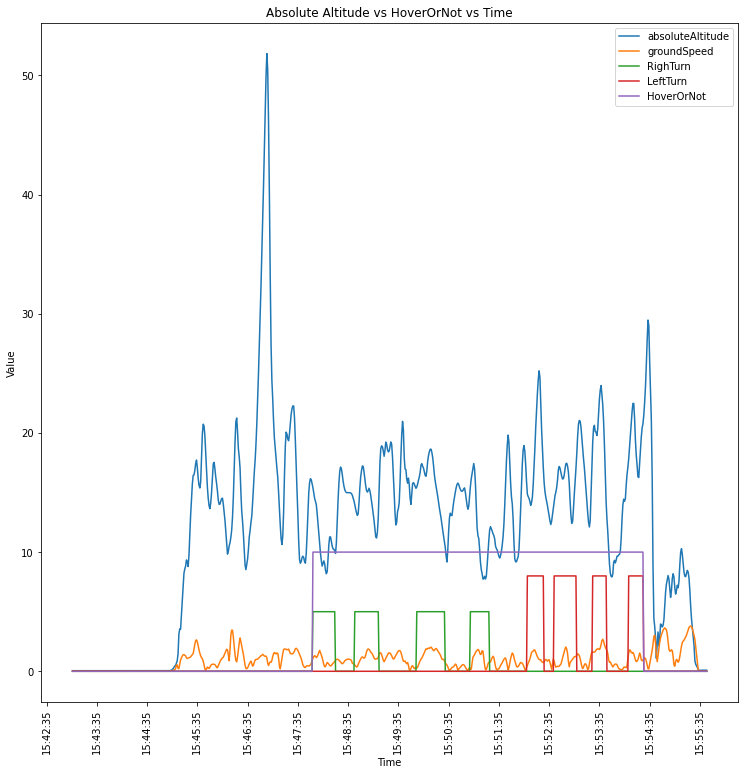

In [8]:
import matplotlib.dates as mdates

plt.figure(figsize=(12.5, 12.5))
plt.plot('datetime','absoluteAltitude',
         data = df3,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df3,
         label = "groundSpeed")
plt.plot('datetime','RighTurn',
         data = df3,
         label = "RighTurn")
plt.plot('datetime','LeftTurn',
         data = df3,
         label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
plt.plot('datetime','HoverOrNot',
         data = df3,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Absolute Altitude vs HoverOrNot vs Time')
plt.legend()
plt.show()

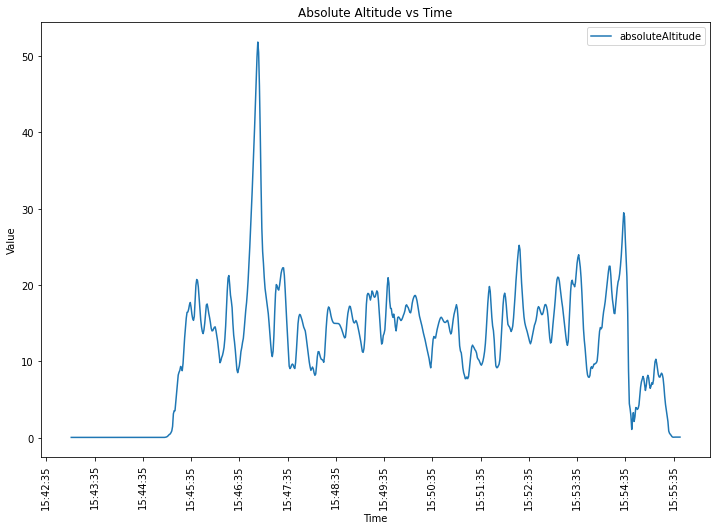

In [9]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = df3,
         label = "absoluteAltitude")
# plt.plot('datetime','groundSpeed',
#          data = df3,
#          label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
# plt.plot('datetime','HoverOrNot',
#          data = df3,
#          label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Absolute Altitude vs Time')
plt.legend()
plt.show()

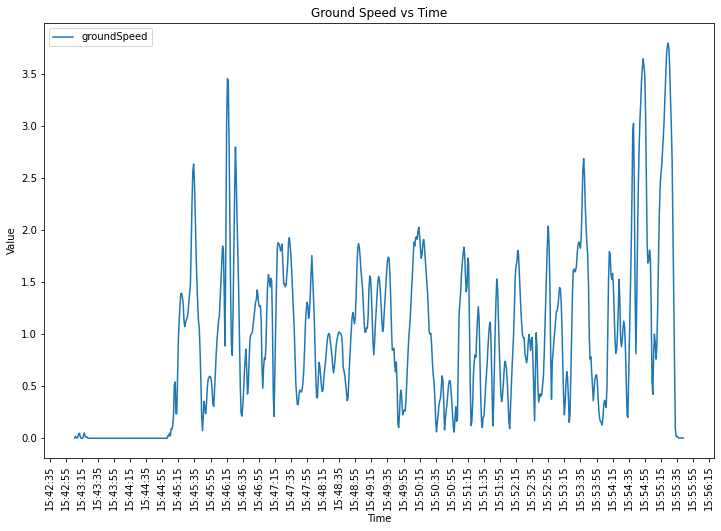

In [10]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
# plt.plot('datetime','absoluteAltitude',
#          data = df3,
#          label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df3,
         label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
# plt.plot('datetime','HoverOrNot',
#          data = df3,
#          label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Ground Speed vs Time')
plt.legend()
plt.show()

In [11]:
df3.to_csv('clean_data_2022.06.09_11.43.06.csv', index=False)

In [12]:
#### Looking at dataset on SimData_2022.06.09_11.57.25.csv.roar.csv

df = pd.read_csv('SimData_2022.06.09_11.57.25.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()



C:\Users\david\AppData\Local\Temp\ipykernel_15712\1659498729.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [13]:
# initalize hover or not, left turn, right turn column
df3['HoverOrNot'] = 0
df3['RighTurn'] = 0
df3['LeftTurn'] = 0

In [14]:
df3

,datetime,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,HoverOrNot,RighTurn,LeftTurn
0,2022-06-09 15:58:15,39.464829,-74.565914,0.030000,221.426125,0.058286,0.119632,0.914042,1.0,-0.267583,7.908500,-0.583583,3.530000,-24.160000,0.000000,-5.871208,-5.871208,0,0,0
1,2022-06-09 15:58:16,39.464829,-74.565914,0.056275,220.822078,0.042612,0.072271,2.014627,1.0,-0.407353,-0.622157,0.525784,3.530000,-24.160000,0.000000,-4.333941,-4.333941,0,0,0
2,2022-06-09 15:58:17,39.464829,-74.565914,0.060000,220.987824,0.005681,0.009573,0.843118,1.0,-0.204529,0.163902,-0.048863,3.530000,-24.160000,0.975882,-2.378314,-2.378314,0,0,0
3,2022-06-09 15:58:18,39.464829,-74.565914,0.060000,221.050830,0.001487,0.002582,0.222189,1.0,-0.106906,-0.030604,-0.085679,3.530000,-24.163453,59.456925,0.651774,0.651774,0,0,0
4,2022-06-09 15:58:19,39.464829,-74.565914,0.060000,221.103255,0.001394,0.002474,0.073961,1.0,-0.049804,-0.003608,-0.133314,3.491745,-24.174176,100.000000,10.487333,10.487333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,2022-06-09 16:33:43,39.464875,-74.565820,0.053200,211.677900,0.001292,0.002405,0.012520,1.0,-0.031260,-6.781720,-9.231040,3.465000,-24.815340,12.067640,17.176460,17.176460,0,0,0
2129,2022-06-09 16:33:44,39.464875,-74.565820,0.060000,211.531400,0.001114,0.002050,0.064300,1.0,-0.059040,-6.974820,-9.181680,3.465000,-24.818520,0.000000,-4.036980,-4.036980,0,0,0
2130,2022-06-09 16:33:45,39.464875,-74.565820,0.060000,211.591940,0.001078,0.001825,0.064120,1.0,-0.018180,-7.299580,-9.198440,3.465000,-24.834300,0.000000,-2.828460,-2.828460,0,0,0
2131,2022-06-09 16:33:46,39.464875,-74.565820,0.060000,211.640939,0.000592,0.001354,0.054143,1.0,0.003449,-7.520184,-9.216429,3.465000,-24.840184,0.000000,-1.642204,-1.642204,0,0,0


In [15]:
# Assign Hover Or Not based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 16:00:24') & (df3['datetime'] <= '2022-06-09 16:06:46'),['HoverOrNot']] = 10
df3.loc[(df3['datetime'] >= '2022-06-09 16:16:00') & (df3['datetime'] <= '2022-06-09 16:18:01'),['HoverOrNot']] = 10
df3.loc[(df3['datetime'] >= '2022-06-09 16:20:42') & (df3['datetime'] <= '2022-06-09 16:23:48'),['HoverOrNot']] = 10

# Assign right turn based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 16:00:24') & (df3['datetime'] <= '2022-06-09 16:00:56'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 16:01:28') & (df3['datetime'] <= '2022-06-09 16:01:57'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 16:02:20') & (df3['datetime'] <= '2022-06-09 16:02:43'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 16:03:07') & (df3['datetime'] <= '2022-06-09 16:03:33'),['RighTurn']] = 5

# Assign left turn based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 16:04:26') & (df3['datetime'] <= '2022-06-09 16:04:37'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 16:05:08') & (df3['datetime'] <= '2022-06-09 16:05:21'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 16:05:40') & (df3['datetime'] <= '2022-06-09 16:05:52'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 16:06:36') & (df3['datetime'] <= '2022-06-09 16:06:46'),['LeftTurn']] = 8

In [49]:
# df3.to_csv('clean_data_2022.06.09_11.57.25.csv', index=False)
df3.to_csv('clean_data_2022.06.09_11.43.06.csv', index=False)

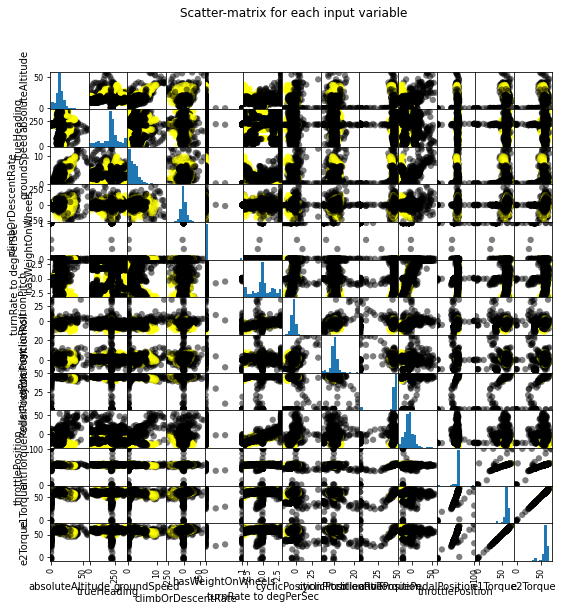

In [50]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['absoluteAltitude',
                 'trueHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                'hasWeightOnWheels',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']
# feature_names = ['absoluteAltitude',
#                  'trueHeading', 
#                  'groundSpeed', 
#                  ]
                
                
                
X = df3[feature_names]
y = df3['HoverOrNot']


cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))



Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.88


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.90


In [53]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.80


In [68]:
# df3.to_csv('clean_data_2022.06.09_11.57.25.csv', index=False)
validation_set = pd.read_csv('clean_data_2022.06.09_11.57.25.csv', parse_dates = ['datetime'])
validation_set

,datetime,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,HoverOrNot,RighTurn,LeftTurn
0,2022-06-09 15:58:15,39.464829,-74.565914,0.030000,221.426125,0.058286,0.119632,0.914042,1.0,-0.267583,7.908500,-0.583583,3.530000,-24.160000,0.000000,-5.871208,-5.871208,0,0,0
1,2022-06-09 15:58:16,39.464829,-74.565914,0.056275,220.822078,0.042612,0.072271,2.014627,1.0,-0.407353,-0.622157,0.525784,3.530000,-24.160000,0.000000,-4.333941,-4.333941,0,0,0
2,2022-06-09 15:58:17,39.464829,-74.565914,0.060000,220.987824,0.005681,0.009573,0.843118,1.0,-0.204529,0.163902,-0.048863,3.530000,-24.160000,0.975882,-2.378314,-2.378314,0,0,0
3,2022-06-09 15:58:18,39.464829,-74.565914,0.060000,221.050830,0.001487,0.002582,0.222189,1.0,-0.106906,-0.030604,-0.085679,3.530000,-24.163453,59.456925,0.651774,0.651774,0,0,0
4,2022-06-09 15:58:19,39.464829,-74.565914,0.060000,221.103255,0.001394,0.002474,0.073961,1.0,-0.049804,-0.003608,-0.133314,3.491745,-24.174176,100.000000,10.487333,10.487333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,2022-06-09 16:33:43,39.464875,-74.565820,0.053200,211.677900,0.001292,0.002405,0.012520,1.0,-0.031260,-6.781720,-9.231040,3.465000,-24.815340,12.067640,17.176460,17.176460,0,0,0
2129,2022-06-09 16:33:44,39.464875,-74.565820,0.060000,211.531400,0.001114,0.002050,0.064300,1.0,-0.059040,-6.974820,-9.181680,3.465000,-24.818520,0.000000,-4.036980,-4.036980,0,0,0
2130,2022-06-09 16:33:45,39.464875,-74.565820,0.060000,211.591940,0.001078,0.001825,0.064120,1.0,-0.018180,-7.299580,-9.198440,3.465000,-24.834300,0.000000,-2.828460,-2.828460,0,0,0
2131,2022-06-09 16:33:46,39.464875,-74.565820,0.060000,211.640939,0.000592,0.001354,0.054143,1.0,0.003449,-7.520184,-9.216429,3.465000,-24.840184,0.000000,-1.642204,-1.642204,0,0,0


In [69]:
X_validation = validation_set[feature_names]
y_validation = validation_set['HoverOrNot']



X_valid = scaler.transform(X_validation)


In [77]:
print('Accuracy of KNN classifier on validation set: {:.2f}'
     .format(knn.score(X_valid, y_validation)))

Accuracy of KNN classifier on validation set: 0.93


In [71]:
X_validation

,absoluteAltitude,trueHeading,groundSpeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,0.030000,221.426125,0.058286,0.914042,1.0,-0.267583,7.908500,-0.583583,3.530000,-24.160000,0.000000,-5.871208,-5.871208
1,0.056275,220.822078,0.042612,2.014627,1.0,-0.407353,-0.622157,0.525784,3.530000,-24.160000,0.000000,-4.333941,-4.333941
2,0.060000,220.987824,0.005681,0.843118,1.0,-0.204529,0.163902,-0.048863,3.530000,-24.160000,0.975882,-2.378314,-2.378314
3,0.060000,221.050830,0.001487,0.222189,1.0,-0.106906,-0.030604,-0.085679,3.530000,-24.163453,59.456925,0.651774,0.651774
4,0.060000,221.103255,0.001394,0.073961,1.0,-0.049804,-0.003608,-0.133314,3.491745,-24.174176,100.000000,10.487333,10.487333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.053200,211.677900,0.001292,0.012520,1.0,-0.031260,-6.781720,-9.231040,3.465000,-24.815340,12.067640,17.176460,17.176460
2129,0.060000,211.531400,0.001114,0.064300,1.0,-0.059040,-6.974820,-9.181680,3.465000,-24.818520,0.000000,-4.036980,-4.036980
2130,0.060000,211.591940,0.001078,0.064120,1.0,-0.018180,-7.299580,-9.198440,3.465000,-24.834300,0.000000,-2.828460,-2.828460
2131,0.060000,211.640939,0.000592,0.054143,1.0,0.003449,-7.520184,-9.216429,3.465000,-24.840184,0.000000,-1.642204,-1.642204


In [72]:
X_valid

array([[0.00000000e+00, 6.17002583e-01, 4.46429416e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.53721867e-04, 6.15303114e-01, 3.26382758e-03, ...,
        0.00000000e+00, 1.94557414e-02, 1.94557414e-02],
       [5.18055565e-04, 6.15769433e-01, 4.35117690e-04, ...,
        9.75882353e-03, 4.42062747e-02, 4.42062747e-02],
       ...,
       [5.18055565e-04, 5.89334359e-01, 8.25922782e-05, ...,
        0.00000000e+00, 3.85091976e-02, 3.85091976e-02],
       [5.18055565e-04, 5.89472216e-01, 4.53803726e-05, ...,
        0.00000000e+00, 5.35225206e-02, 5.35225206e-02],
       [5.18055565e-04, 5.89573536e-01, 4.53803726e-05, ...,
        0.00000000e+00, 6.32801456e-02, 6.32801456e-02]])

In [73]:
prediction = svm.predict(X_valid)

In [74]:
len(prediction)

2133

In [75]:
validation_set['predicted_value'] = prediction

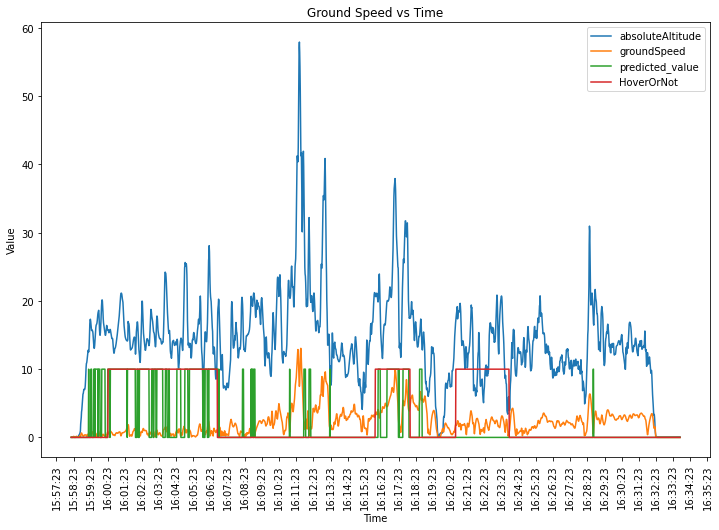

In [76]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = validation_set,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_set,
         label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
plt.plot('datetime','predicted_value',
         data = validation_set,
         label = "predicted_value")
plt.plot('datetime','HoverOrNot',
         data = validation_set,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Ground Speed vs Time')
plt.legend()
plt.show()

In [30]:
validation_set

,datetime,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,...,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,HoverOrNot,RighTurn,LeftTurn,predicted_value
0,2022-06-09 15:43:06,40.077694,-75.019995,0.05,43.835714,0.001693,0.002878,-0.004714,1.0,-0.146286,...,-0.064571,3.432000,-22.673429,48.264429,40.272857,40.272857,0,0,0,0
1,2022-06-09 15:43:07,40.077694,-75.019995,0.05,43.698867,0.019078,0.032244,-0.011800,1.0,-0.157600,...,0.190511,3.431000,-20.987311,47.721844,39.883400,39.883400,0,0,0,0
2,2022-06-09 15:43:08,40.077694,-75.019995,0.05,43.650045,0.010557,0.017882,-0.017614,1.0,-0.113864,...,-0.178341,3.431000,-12.821045,46.284614,38.188114,38.188114,0,0,0,0
3,2022-06-09 15:43:09,40.077694,-75.019995,0.05,43.593400,0.000974,0.001804,-0.003267,1.0,-0.085044,...,-0.081267,3.438000,-12.105978,45.200267,36.612822,36.612822,0,0,0,0
4,2022-06-09 15:43:10,40.077694,-75.019995,0.05,43.473578,0.011705,0.019763,0.009133,1.0,-0.086244,...,-0.520844,3.436933,-17.234333,44.836978,36.363000,36.363000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2022-06-09 15:55:39,40.077689,-75.020002,0.09,50.397089,0.001975,0.003515,0.023756,1.0,-0.037044,...,-0.203956,3.471000,7.270867,43.896667,34.904511,34.904511,0,0,0,0
754,2022-06-09 15:55:40,40.077689,-75.020002,0.09,50.181273,0.006706,0.011486,-0.015682,1.0,-0.091886,...,-0.243568,3.471000,3.902773,10.944477,14.282273,14.282273,0,0,0,0
755,2022-06-09 15:55:41,40.077689,-75.020002,0.09,49.903778,0.002567,0.004490,0.037200,1.0,-0.134667,...,-0.266667,3.471000,2.571667,0.000000,-4.095667,-4.095667,0,0,0,0
756,2022-06-09 15:55:42,40.077689,-75.020002,0.09,49.951196,0.001288,0.002383,-0.046957,1.0,-0.067848,...,-0.262457,3.471000,1.586804,0.000000,-2.823043,-2.823043,0,0,0,0


In [31]:
prediction

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 10,  0, 10,  0,  0,  0,  0,  0, 10,  0,  0,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0, 10, 10,
       10,  0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10,  0,  0,  0,  0,  0,  0, 10,  0, 10,  0,  0,  0,  0, 10,  0,
        0,  0, 10, 10, 10

In [32]:
df3

,datetime,latitude,longitude,absoluteAltitude,trueHeading,groundSpeed,trueAirspeed,climbOrDescentRate,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,HoverOrNot,RighTurn,LeftTurn
0,2022-06-09 15:58:15,39.464829,-74.565914,0.030000,221.426125,0.058286,0.119632,0.914042,1.0,-0.267583,7.908500,-0.583583,3.530000,-24.160000,0.000000,-5.871208,-5.871208,0,0,0
1,2022-06-09 15:58:16,39.464829,-74.565914,0.056275,220.822078,0.042612,0.072271,2.014627,1.0,-0.407353,-0.622157,0.525784,3.530000,-24.160000,0.000000,-4.333941,-4.333941,0,0,0
2,2022-06-09 15:58:17,39.464829,-74.565914,0.060000,220.987824,0.005681,0.009573,0.843118,1.0,-0.204529,0.163902,-0.048863,3.530000,-24.160000,0.975882,-2.378314,-2.378314,0,0,0
3,2022-06-09 15:58:18,39.464829,-74.565914,0.060000,221.050830,0.001487,0.002582,0.222189,1.0,-0.106906,-0.030604,-0.085679,3.530000,-24.163453,59.456925,0.651774,0.651774,0,0,0
4,2022-06-09 15:58:19,39.464829,-74.565914,0.060000,221.103255,0.001394,0.002474,0.073961,1.0,-0.049804,-0.003608,-0.133314,3.491745,-24.174176,100.000000,10.487333,10.487333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,2022-06-09 16:33:43,39.464875,-74.565820,0.053200,211.677900,0.001292,0.002405,0.012520,1.0,-0.031260,-6.781720,-9.231040,3.465000,-24.815340,12.067640,17.176460,17.176460,0,0,0
2129,2022-06-09 16:33:44,39.464875,-74.565820,0.060000,211.531400,0.001114,0.002050,0.064300,1.0,-0.059040,-6.974820,-9.181680,3.465000,-24.818520,0.000000,-4.036980,-4.036980,0,0,0
2130,2022-06-09 16:33:45,39.464875,-74.565820,0.060000,211.591940,0.001078,0.001825,0.064120,1.0,-0.018180,-7.299580,-9.198440,3.465000,-24.834300,0.000000,-2.828460,-2.828460,0,0,0
2131,2022-06-09 16:33:46,39.464875,-74.565820,0.060000,211.640939,0.000592,0.001354,0.054143,1.0,0.003449,-7.520184,-9.216429,3.465000,-24.840184,0.000000,-1.642204,-1.642204,0,0,0
